# Laboratorio 3: Clasificación de rótulos de tráfico utilizando CNN Le-Net

- Mark Albrand 21004
- Jimena Hernandez 21199

In [473]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

#1. 

### Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba.

In [474]:
entrenamiento = pd.read_pickle('data/entrenamiento.p')
validacion = pd.read_pickle('data/validacion.p')
prueba = pd.read_pickle('data/prueba.p')

In [475]:
entrenamiento

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [476]:
prueba

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8),
 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ..

In [477]:
validacion

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

In [478]:
print("Tamaño de los datos de entrenamiento: ", len(entrenamiento['features']))
print("Tamaño de los datos de validación: ", len(validacion['features']))
print("Tamaño de los datos de prueba: ", len(prueba['features']))

Tamaño de los datos de entrenamiento:  34799
Tamaño de los datos de validación:  4410
Tamaño de los datos de prueba:  12630


### Realizar preprocesamiento de las imágenes, como redimensionarlas a un tamaño estándar, normalización, etc.

**Dimensión de las imagenes : 32x32**

Esta es la dimensión original de las imágenes en el conjunto de datos. Se considera que no es necesario redimensionar las imágenes a un tamaño estándar, ya que todas las imágenes tienen la misma dimensión y no es una dimensión muy grande.

In [479]:
print("Dimensiones de las imágenes de entrenamiento: ", entrenamiento['features'][5000].shape)
print("Dimensiones de las imágenes de validación: ", validacion['features'][100].shape)
print("Dimensiones de las imágenes de prueba: ", prueba['features'][5000].shape)

Dimensiones de las imágenes de entrenamiento:  (32, 32, 3)
Dimensiones de las imágenes de validación:  (32, 32, 3)
Dimensiones de las imágenes de prueba:  (32, 32, 3)


In [480]:
dim1 = []
dim2 = []

for image in entrenamiento['features']:
    d1, d2, colors = image.shape
    dim1.append(d1)
    dim2.append(d2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

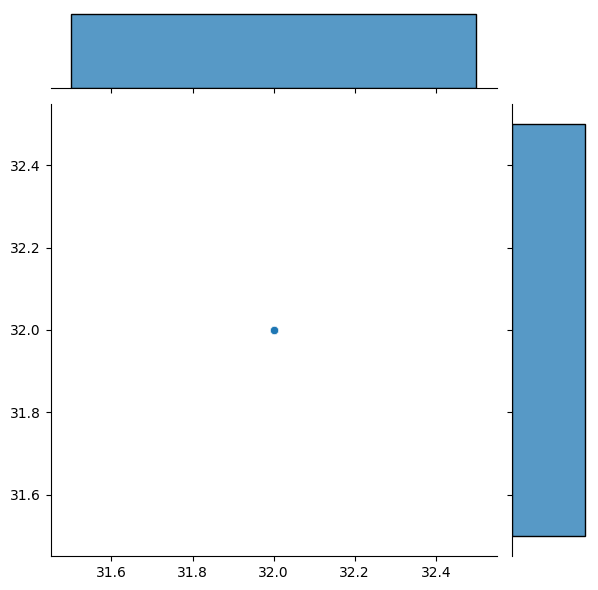

In [481]:
sns.jointplot(x = dim1, y = dim2)

In [482]:
dim3 = []
dim4 = []

for image in validacion['features']:
    d3, d4, colors = image.shape
    dim3.append(d3)
    dim4.append(d4)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

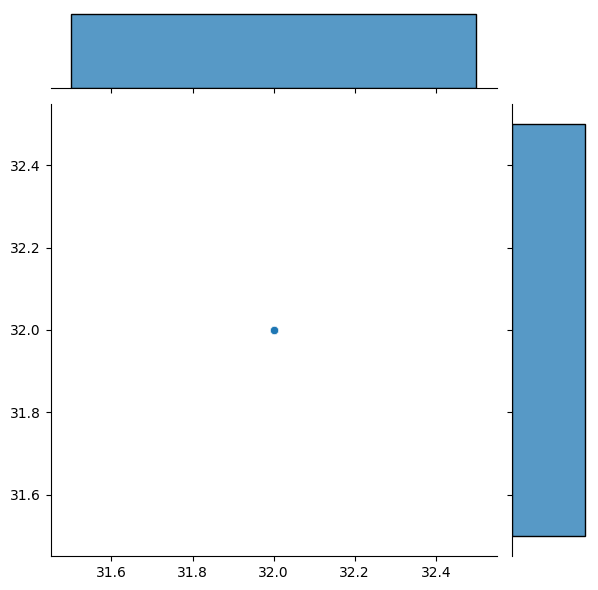

In [483]:
sns.jointplot(x = dim3, y = dim4)

In [484]:
dim5 = []
dim6 = []

for image in prueba['features']:
    d5, d6, colors = image.shape
    dim5.append(d5)
    dim6.append(d6)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

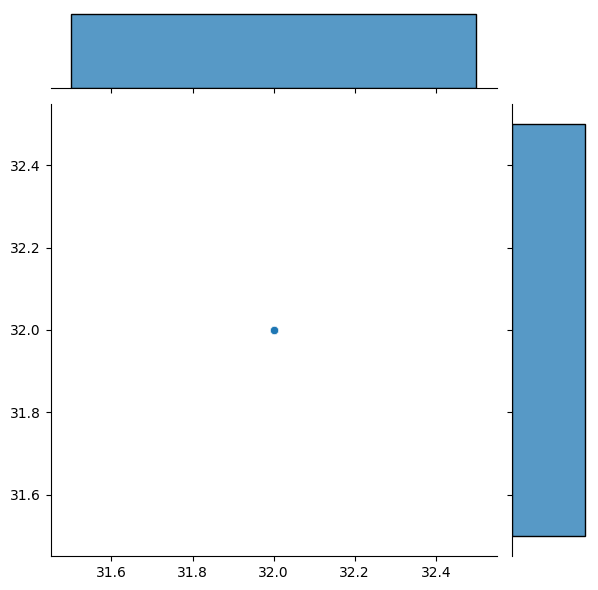

In [485]:
sns.jointplot(x = dim5, y = dim6)

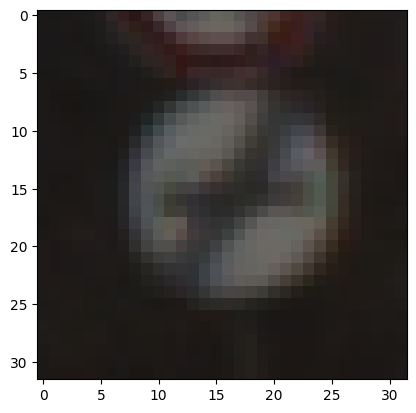

In [486]:
plt.imshow(entrenamiento['features'][1])

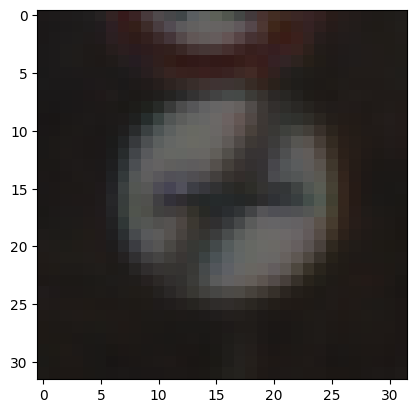

In [487]:
plt.imshow(entrenamiento['features'][2])

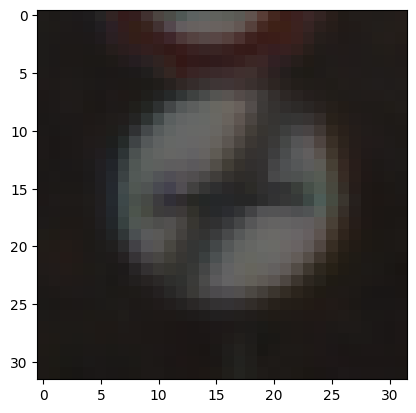

In [488]:
plt.imshow(entrenamiento['features'][3])

Se puede observar con las imágenes anteriores que el conjunto de datos ya posee información artificial, resultante de aplicar distintos filtros y transformaciones a las imágenes originales. Por lo tanto, no se realizará ningún tipo de preprocesamiento adicional a las imágenes.

## 2. Implementación de la arquitectura Le-Net

### Presentar la arquitectura Le-Net en detalle, explicando cada capa (convolucional, pooling, fully connected)

Esta arquitectura es una red convolucional que contiene una estructura con varias capas clave. 

Estas capas son las siguientes:
- Capa convolutiva y luego pooling
- Capa convolutiva y luego pooling
- Fully Connected Layers que nos ayuda a hacer la clasificación final que en este caso es para 43 variables distintas.

Cada una de estas capas utiliza funciones de activación no lineales, como la función sigmoide o ReLU, para introducir no linealidades en la red.

Esta arquitectura es muy utilizada en la clasificación de imágenes y es muy efectiva para este tipo de problemas. El uso de capas convolutivas y pooling nos ayuda a reducir la cantidad de parámetros que se deben entrenar, lo que hace que el entrenamiento sea más rápido y eficiente.

LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-Based Learning Applied to Document Recognition.








### Mostrar el diseño de la red Le-Net utilizando una herramienta de diagramación.
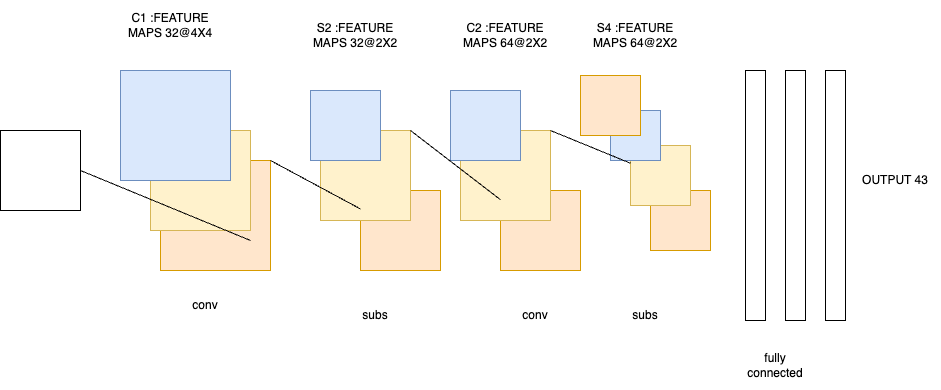

### Explicar el proceso de convolución, función de activación y pooling

- Convolución: En las capas de convolución se aplican filtros a la imagen de entrada para extraer características importantes. Estos filtros se aplican a la imagen de entrada y se deslizan por la imagen para obtener una matriz de características.
- Activación: La función de activación se aplica a la salida de la capa de convolución para introducir no linealidad en la red. La función de activación más comúnmente utilizada es la función ReLU.
- Pooling: La capa de pooling se utiliza para reducir la dimensionalidad de la imagen y extraer características importantes. En esta capa, se toma una ventana de píxeles y se aplica una operación de pooling, como el promedio o el máximo, para obtener un solo valor.

## 3. Construcción del modelo

Antes de construir el modelo, se debe realizar un preprocesamiento de los datos. En este caso, se normalizarán las imágenes dividiendo cada pixel por 255. Esto se hace para que los valores de los pixeles estén en el rango de 0 a 1.

Además se utiliza `tf.keras.utils.to_categorical` para convertir las etiquetas en un formato one-hot encoding.

In [489]:
import tensorflow as tf

x_train = entrenamiento['features']
y_train = entrenamiento['labels']

x_validation = validacion['features']
y_validation = validacion['labels']

x_test = prueba['features']
y_test = prueba['labels']

x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 43)
y_validation = tf.keras.utils.to_categorical(y_validation, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

In [490]:
print("Tamaño de x_train: ", x_train.shape)

print("Tamaño de y_train: ", y_train.shape)
print(y_train)

Tamaño de x_train:  (34799, 32, 32, 3)
Tamaño de y_train:  (34799, 43)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [491]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [492]:
forma_imagen = entrenamiento['features'][0].shape

### Definir la estructura de capas convolucionales, capas de pooling y capas fully connected

En este diseño final se utilizó una estructura de dos conjuntos de capa convolutional, pooling y dropout, seguido de dos capas fully connected y un último dropout. Para la capa de salida se utilizó una capa fully connected con una función de activación softmax del tamaño de las clases.

In [493]:
# Configurar el modelo

modelo = Sequential()

# Capa convolucional 1
modelo.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=forma_imagen, activation='relu'))
# Capa de pooling 1
modelo.add(MaxPool2D(pool_size=(2, 2)))
# Dropout
modelo.add(Dropout(0.25))

# Capa convolucional 2
modelo.add(Conv2D(filters=64, kernel_size=(2,2),input_shape=forma_imagen, activation='relu'))
# Capa de pooling 2
modelo.add(MaxPool2D(pool_size=(2, 2)))
# Dropout
modelo.add(Dropout(0.25))

# Aplanar la imagen
modelo.add(Flatten())

# Capa fully connected
modelo.add(Dense(256, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(128, activation='relu'))   

# Capa de salida
modelo.add(Dense(43, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Explicar la importancia de la función de pérdida y el optimizador


In [494]:
from tensorflow.keras.callbacks import EarlyStopping

modelo.compile(
    loss='categorical_crossentropy',  # Función de pérdida para problemas de clasificación multiclase
    optimizer='adam',
    metrics=['accuracy', 'precision']
)

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [495]:
modelo.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 13, 13, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 638,347 (2.44 MB)

 Trainable params: 638,347 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento del modelo

En esta sección inicia el entrenamiento del modelo. Se definen como hipérparametros el número de épocas y el tamaño del batch. Se utiliza el optimizador Adam y la función de pérdida de entropía cruzada categórica.

Los datos de entrenamiento y validación fueron previamente transformados a un formato adecuado para ser utilizados en el entrenamiento, durante la sección 3.

Al ejecutar esta celda, se mostrará el progreso del entrenamiento, incluyendo la pérdida y la precisión en el conjunto de entrenamiento y validación.

In [496]:
BATCH_SIZE = 32
ITERACIONES = 20


modelo.fit(
    x_train, # Set de entrenamiento
    y_train,  # Etiquetas del set de entrenamiento
    epochs=ITERACIONES, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_validation, y_validation), 
    callbacks=[early_stop]
)

Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3280 - loss: 2.3983 - precision: 0.7138 - val_accuracy: 0.8594 - val_loss: 0.5194 - val_precision: 0.9314
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8209 - loss: 0.5525 - precision: 0.8935 - val_accuracy: 0.9397 - val_loss: 0.2447 - val_precision: 0.9748
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8943 - loss: 0.3323 - precision: 0.9278 - val_accuracy: 0.9395 - val_loss: 0.1925 - val_precision: 0.9573
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9164 - loss: 0.2660 - precision: 0.9401 - val_accuracy: 0.9587 - val_loss: 0.1630 - val_precision: 0.9745
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9347 - loss: 0.2063 - precision: 0.9529 - val_accuracy: 0.9531 - val_loss: 0.1611 - val_precision: 0.9650
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9427 - loss: 0.1877 - precision: 0.9567 - val_accu

## 5. Evaluación del modelo

### Evaluar el modelo entrenado utilizando el conjunto de prueba.

Para evaluar el modelo, se utiliza el conjunto de prueba que no fue utilizado en el entrenamiento. Se calcula la precisión del modelo en este conjunto de datos.

Con esto, se muestra la gráfica que compara la pérdida y la pérdida en el conjunto de validación.

In [497]:
perdidas = pd.DataFrame(modelo.history.history)

<Axes: >

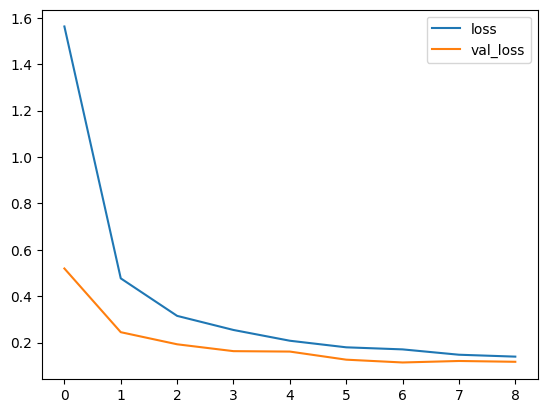

In [498]:
perdidas[['loss','val_loss']].plot()

### Cálculo de métricas de evaluación: Precisión, Recall y F1-Score para cada clase

Para el cálcuo de las métricas de evaluación, se utiliza la función 'classification_report' de la librería 'sklearn.metrics'. Esta función calcula la precisión, recall y f1-score para cada clase.

Se necesita convertir las etiquetas de las predicciones y del conjunto de prueba a su valor original, ya que se encuentran en formato one-hot encoding.

Como se puede obsevar en los resultados de este reporte, los resultados de nuestra red son bastante buenos, con una precisión y recall bastante altos para prácticamente todas las clases. Con esto se puede concluir que la red es capaz de clasificar correctamente la mayoría de las imágenes en el conjunto de prueba.

In [499]:
# Mostrar Accuracy, Precision, Recall y F1-Score en el conjunto de validación

from sklearn.metrics import classification_report

y_pred = modelo.predict(x_test)

y_pred_clasess = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_clasess))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.96      0.96      0.96       720
           2       0.95      0.95      0.95       750
           3       0.95      0.92      0.93       450
           4       0.97      0.96      0.96       660
           5       0.84      0.95      0.89       630
           6       1.00      0.90      0.95       150
           7       0.98      0.87      0.92       450
           8       0.94      0.95      0.95       450
           9       0.96      1.00      0.98       480
          10       0.98      0.99      0.99       660
          11       0.93      0.93      0.93       420
          12       0.99      0.97      0.98       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       0.99      0.99      0

## 6. Mejoras y experimentación

### Mejoras del rendimiento del modelo y resultados

En nuestra opinión, el modelo ya tiene un rendimiento bastante bueno, ya que la precisión en el conjunto de prueba es de 0.94 y un accuracy de 0.95, esto se toma como un buen rendimiento debido a que lo que buscamos principalmente es que el modelo sea capaz de clasificar correctamente las imágenes. Además, el entrenamiento no es particularmente largo, tardando menos de 3 minutos en completarse. Aún así, se pueden realizar algunas mejoras para intentar mejorar el rendimiento del modelo.

### Ajustes realizados en la arquitectura de la red (Experimentos)

Esta red neuronal empezó con una estructura más sencilla, teniendo solo dos pares de capas convolucionales y pooling y sus capas fully connected. Con esto, el modelo se sobreajustó de manera rápida, alrededor de las 6 iteraciones. Por lo que se decidió agregar DropOuts y una capa densa más para intentar mejorar el rendimiento del modelo.

Estos cambios resultaron en una mejora en la precisión del modelo, y es la configuración que se utilizó para el entrenamiento del modelo.

En situaciones reales, los dropouts y las capas densas adicionales pueden ayudar a mejorar el rendimiento del modelo, ya que ayudan a reducir el sobreajuste y a mejorar la generalización del modelo.